Air video

frame # 320

In [1]:
import numpy as np
import cv2


vidcap = cv2.VideoCapture('air/air.mp4')
success,image = vidcap.read()
count = 0
while success:
  cv2.imwrite("air/frame%d.jpg" % count, image)     # save frame as JPEG file      
  success,image = vidcap.read()
  print('Read a new frame: ', count )
  count += 1

In [5]:
import matplotlib.pyplot as plt
import numpy as np

Water video

vidcap = cv2.VideoCapture('water/water.mp4')
success,image = vidcap.read()
count = 0
while success:
  cv2.imwrite("water/frame%d.jpg" % count, image)     # save frame as JPEG file      
  success,image = vidcap.read()
  print('Read a new frame: ', count )
  count += 1

Steady interface, salt:


vidcap = cv2.VideoCapture('steady_after/steady_after.mp4')
success,image = vidcap.read()
count = 0
while success:
  cv2.imwrite("steady_after/frame%d.jpg" % count, image)     # save frame as JPEG file      
  success,image = vidcap.read()
  print('Read a new frame: ', count )
  count += 1

vidcap = cv2.VideoCapture('wave/wave.mp4')
success,image = vidcap.read()
count = 0
while success:
  cv2.imwrite("wave/frame%d.jpg" % count, image)     # save frame as JPEG file      
  success,image = vidcap.read()
  print('Read a new frame: ', count )
  count += 1

Cutting out the relevant part

In [3]:
import cv2
#air = cv2.flip(cv2.imread("air/frame500.jpg", cv2.IMREAD_GRAYSCALE), -1)
water = cv2.flip(cv2.imread("water/frame500.jpg", cv2.IMREAD_GRAYSCALE), -1)
img = cv2.flip(cv2.imread("wave/frame500.jpg", cv2.IMREAD_GRAYSCALE), -1)

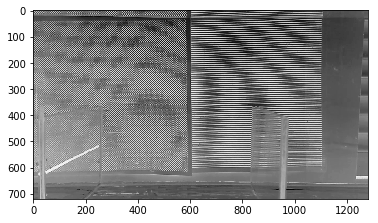

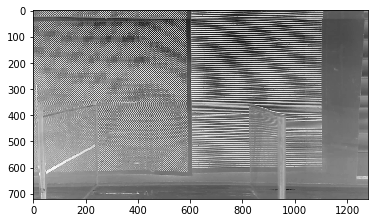

In [6]:
plt.imshow(water, cmap='Greys')
plt.show()
plt.imshow(img, cmap='Greys')

In [7]:
#img = cv2.flip(cv2.imread("wave/frame300.jpg", cv2.IMREAD_GRAYSCALE), -1)
#plt.imshow(img, cmap = 'Greys')
imgcut = img[50:600, 600:800]
refcut = water[50:600, 600:800]


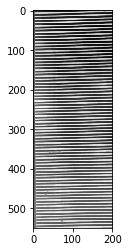

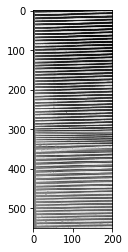

In [8]:
plt.imshow(refcut, cmap = 'Greys')
plt.show()
plt.imshow(imgcut, cmap = 'Greys')


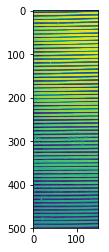

In [41]:
ref = water[200:700, 650:800]

plt.imshow(ref)

400:600 és 1000:1200

In [14]:
def write_frames(num):
    air = cv2.flip(cv2.imread("air/frame%s.jpg" %num, cv2.IMREAD_GRAYSCALE), -1)
    water = cv2.flip(cv2.imread("water/frame%s.jpg" %num, cv2.IMREAD_GRAYSCALE), -1)
    img = cv2.flip(cv2.imread("salt/frame%s.jpg" %num, cv2.IMREAD_GRAYSCALE), -1)
    cv2.imwrite("air.tif", air)     # save frame as JPEG file      
    cv2.imwrite("water.tif", water)
    cv2.imwrite("salt.tif", img)     # save frame as JPEG file      


In [93]:
img = cv2.flip(cv2.imread("wave/frame5760.jpg", cv2.IMREAD_GRAYSCALE), -1)
cv2.imwrite("wave.tif", img)     # save frame as JPEG file      


True

In [15]:
write_frames(400)

## Line counting

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
refref = refcut[:, 100]
imgref = imgcut[:, 100]

peaksimg, _ = find_peaks(255.-imgref, height=125)
peaks, _ = find_peaks(255.-refref, height=125)

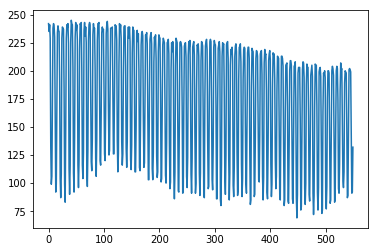

In [53]:
plt.plot(refref)
#plt.plot(imgref)

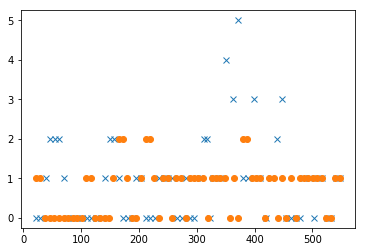

In [54]:
plt.plot(peaksimg[2:], np.abs(np.diff(np.diff(peaksimg))), "x")
plt.plot(peaks[2:], np.abs(np.diff(np.diff(peaks))), "o")

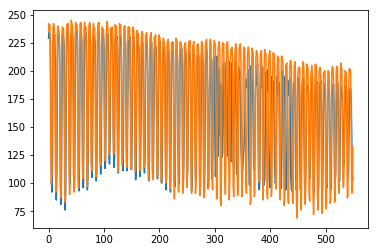

In [67]:
plt.plot(imgref)
plt.plot(refref)

In [55]:
def printMaxAmpl(img, ref, col):
    img = img[50:600, 600:800]
    #ref = ref[180:550, 600:700]
    
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    img = clahe.apply(img)
    imgref = img[:,col]
    refref = refcut[:,col]
    peaksimg, _ = find_peaks(255.-imgref, height=125)
    peaks, _ = find_peaks(255.-refref, height=125)
    shorter =  np.min([len(peaksimg), len(peaks)])
    peaksimgcut = peaksimg[:shorter]
    peakscut = peaks[:shorter]
    maxplace = np.argmax(np.abs(np.diff(np.diff(peaksimgcut)) - np.diff(np.diff(peakscut))))
    return [maxplace, np.max(np.abs(np.diff(np.diff(peaksimgcut)) - np.diff(np.diff(peakscut))))]

In [11]:

import openpiv.validation
import openpiv.filters
import openpiv.scaling
import scipy
import openpiv.tools
import openpiv.process
import openpiv.scaling

In [17]:

def printMaxAmpl(img, ref, col):
    img = img[50:600, 600:800]
    #ref = ref[180:550, 600:700]
    
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    img = clahe.apply(img)
    imgref = img[:,col]
    refref = ref[:,col]
    peaksimg, _ = find_peaks(255.-imgref, height=100)
    peaks, _ = find_peaks(255.-refref, height=100)
    shorter =  np.min([len(peaksimg), len(peaks)])
    peaksimgcut = peaksimg[:shorter]
    peakscut = peaks[:shorter]
    maxplace = np.argmax(np.abs(np.diff(np.diff(peaksimgcut)) - np.diff(np.diff(peakscut))))
    return [maxplace, np.max(np.abs(np.diff(np.diff(peaksimgcut)) - np.diff(np.diff(peakscut))))]

In [10]:
def read_file(src):
    img = cv2.flip(cv2.imread(src, cv2.IMREAD_GRAYSCALE), -1)
    return img

Text(0,0.5,'Interface Position [px]')

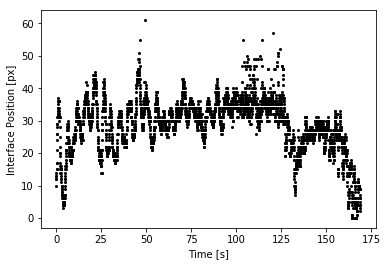

In [19]:
plt.plot(np.arange(0., 3720., 1)/22., ampls, 'o', c='black', markersize=2.)
#xplt.xlim(39, 400)
#plt.ylim(20, 60)
plt.xlabel('Time [s]')
plt.ylabel('Interface Position [px]')
#plt.savefig('Interface_position_.png', bbox_inches='tight')

Filtering by FFT

In [59]:
dt = 1./22.
T = 2./dt
print(T)

44.0


In [60]:
t = np.linspace(0., 8600*dt, 8600)
f = np.linspace(0., 44., 8600//2)

In [61]:
from scipy.fftpack import fft, irfft, ifft

In [62]:
asd = fft(ampls)

(0.0, 2)

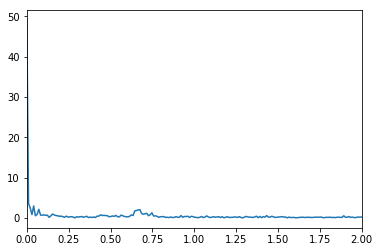

In [63]:
plt.plot(f, 2.0/8600 * np.abs(asd[0:8600//2]))
plt.xlim(0., 2)

In [64]:
2.*np.pi/0.66

9.519977738150887

In [65]:
2*np.pi/60.

0.10471975511965977

Setting really low frequency components to 0

In [66]:
asd[asd < 0.5] = 0.

(5000.0, 6000)

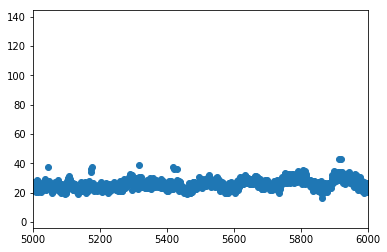

In [67]:
plt.plot(np.real(ifft(asd)), 'o')

plt.xlim(5000., 6000)

In [69]:
filtered = np.real(ifft(asd))

#### Amplitúdó mérésére: sliding standard deviation. 

7 seces ablakban rolling std:

(0.0, 50)

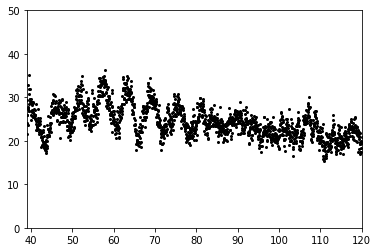

In [88]:
plt.plot(np.arange(0., 8600., 1)/22., filtered, 'o', c='black', markersize=2.)
plt.xlim(39., 120)
plt.ylim(0., 50)

In [80]:
W = 10*22 # Window size
a = np.array(filtered)
nrows = a.size - W + 1
n = a.strides[0]
a2D = np.lib.stride_tricks.as_strided(a,shape=(nrows,W),strides=(n,n))
out = np.std(a2D, axis=1)

(0.0, 39.0)

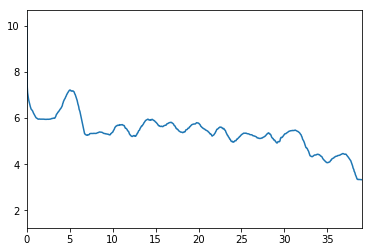

In [85]:
plt.plot(np.arange(0., out.size, 1)/22., out)
plt.xlim(0., 39.)

## 4V

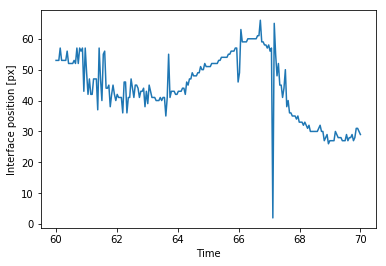

Max Amplitude at 0.2  ampl:  10.057691126457675


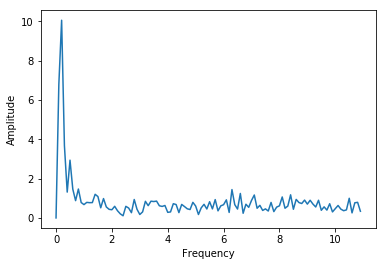

In [20]:
imin = 60*22
imax =70*22
t1 = imax /22
t0 = imin/22
n_samples = imax-imin
ampls = []
for i in range(imin, imax):
    #print(i)
    img = read_file("wave/frame%s.jpg" %i)
    amplsincol = []

    ampls.append(printMaxAmpl(img, refcut,100)[0])
ampls = np.array(ampls)
plt.plot(np.linspace(t0, t1, ampls.shape[0]), ampls)
plt.xlabel('Time')
plt.ylabel('Interface position [px]')
plt.show()
#plt.xlim(90, 150)

np_fft = np.fft.fft(ampls-np.average(ampls))
amplitudes = 2/n_samples * np.abs(np_fft) 
frequencies = np.fft.fftfreq(n_samples) * n_samples * 1/(t1-t0)
print("Max Amplitude at", frequencies[:len(frequencies)//2][np.argmax(amplitudes)], " ampl: ", np.max(amplitudes))

plt.plot(frequencies[:len(frequencies)//2], amplitudes[:len(np_fft)//2])
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

## 5 V

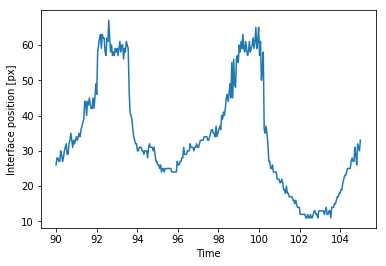

Max Amplitude at 0.13333333333333333  ampl:  17.20335888192469


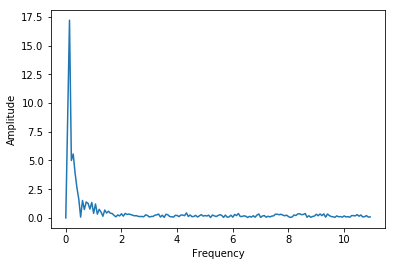

In [22]:
imin = 90*22
imax =105*22
t1 = imax /22
t0 = imin/22
n_samples = imax-imin
ampls = []
for i in range(imin, imax):
    #print(i)
    img = read_file("wave/frame%s.jpg" %i)
    amplsincol = []

    ampls.append(printMaxAmpl(img, refcut,100)[0])
ampls = np.array(ampls)
plt.plot(np.linspace(t0, t1, ampls.shape[0]), ampls)
plt.xlabel('Time')
plt.ylabel('Interface position [px]')
plt.show()
#plt.xlim(90, 150)

np_fft = np.fft.fft(ampls-np.average(ampls))
amplitudes = 2/n_samples * np.abs(np_fft) 
frequencies = np.fft.fftfreq(n_samples) * n_samples * 1/(t1-t0)
print("Max Amplitude at", frequencies[:len(frequencies)//2][np.argmax(amplitudes)], " ampl: ", np.max(amplitudes))

plt.plot(frequencies[:len(frequencies)//2], amplitudes[:len(np_fft)//2])
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

## 6V

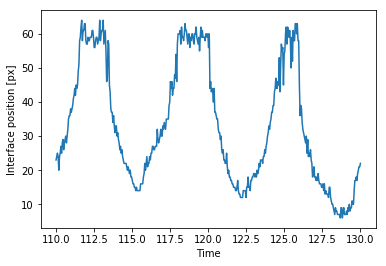

Max Amplitude at 0.15  ampl:  23.194568154293023


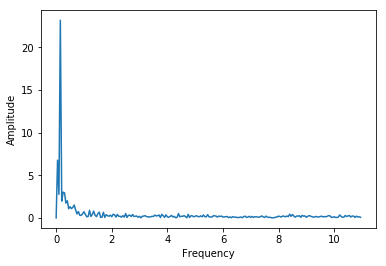

In [24]:
imin = 110*22
imax =130*22
t1 = imax /22
t0 = imin/22
n_samples = imax-imin
ampls = []
for i in range(imin, imax):
    #print(i)
    img = read_file("wave/frame%s.jpg" %i)
    amplsincol = []

    ampls.append(printMaxAmpl(img, refcut,100)[0])
ampls = np.array(ampls)
plt.plot(np.linspace(t0, t1, ampls.shape[0]), ampls)
plt.xlabel('Time')
plt.ylabel('Interface position [px]')
plt.show()
#plt.xlim(90, 150)

np_fft = np.fft.fft(ampls-np.average(ampls))
amplitudes = 2/n_samples * np.abs(np_fft) 
frequencies = np.fft.fftfreq(n_samples) * n_samples * 1/(t1-t0)
print("Max Amplitude at", frequencies[:len(frequencies)//2][np.argmax(amplitudes)], " ampl: ", np.max(amplitudes))

plt.plot(frequencies[:len(frequencies)//2], amplitudes[:len(np_fft)//2])
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

## 7V

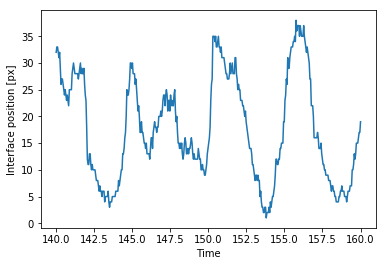

Max Amplitude at 0.2  ampl:  11.14964235065676


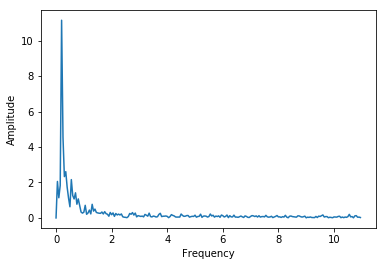

In [25]:
imin = 140*22
imax =160*22
t1 = imax /22
t0 = imin/22
n_samples = imax-imin
ampls = []
for i in range(imin, imax):
    #print(i)
    img = read_file("wave/frame%s.jpg" %i)
    amplsincol = []

    ampls.append(printMaxAmpl(img, refcut,100)[0])
ampls = np.array(ampls)
plt.plot(np.linspace(t0, t1, ampls.shape[0]), ampls)
plt.xlabel('Time')
plt.ylabel('Interface position [px]')
plt.show()
#plt.xlim(90, 150)

np_fft = np.fft.fft(ampls-np.average(ampls))
amplitudes = 2/n_samples * np.abs(np_fft) 
frequencies = np.fft.fftfreq(n_samples) * n_samples * 1/(t1-t0)
print("Max Amplitude at", frequencies[:len(frequencies)//2][np.argmax(amplitudes)], " ampl: ", np.max(amplitudes))

plt.plot(frequencies[:len(frequencies)//2], amplitudes[:len(np_fft)//2])
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

## 8 V

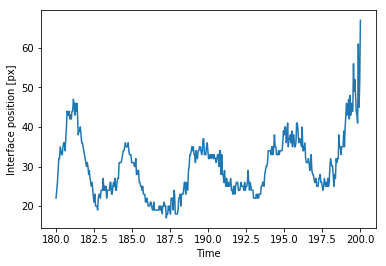

Max Amplitude at 0.2  ampl:  6.517383342513006


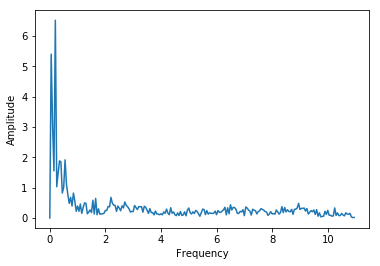

In [26]:
imin = 180*22
imax =200*22
t1 = imax /22
t0 = imin/22
n_samples = imax-imin
ampls = []
for i in range(imin, imax):
    #print(i)
    img = read_file("wave/frame%s.jpg" %i)
    amplsincol = []

    ampls.append(printMaxAmpl(img, refcut,100)[0])
ampls = np.array(ampls)
plt.plot(np.linspace(t0, t1, ampls.shape[0]), ampls)
plt.xlabel('Time')
plt.ylabel('Interface position [px]')
plt.show()
#plt.xlim(90, 150)

np_fft = np.fft.fft(ampls-np.average(ampls))
amplitudes = 2/n_samples * np.abs(np_fft) 
frequencies = np.fft.fftfreq(n_samples) * n_samples * 1/(t1-t0)
print("Max Amplitude at", frequencies[:len(frequencies)//2][np.argmax(amplitudes)], " ampl: ", np.max(amplitudes))

plt.plot(frequencies[:len(frequencies)//2], amplitudes[:len(np_fft)//2])
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

## 9 V

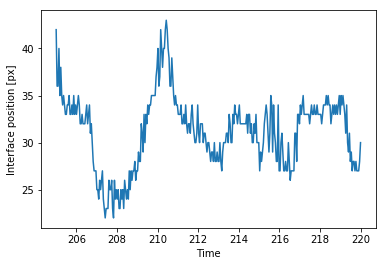

Max Amplitude at 0.13333333333333333  ampl:  2.8383291886177284


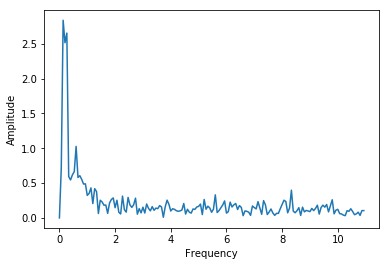

In [28]:
imin = 205*22
imax =220*22
t1 = imax /22
t0 = imin/22
n_samples = imax-imin
ampls = []
for i in range(imin, imax):
    #print(i)
    img = read_file("wave/frame%s.jpg" %i)
    amplsincol = []

    ampls.append(printMaxAmpl(img, refcut,100)[0])
ampls = np.array(ampls)
plt.plot(np.linspace(t0, t1, ampls.shape[0]), ampls)
plt.xlabel('Time')
plt.ylabel('Interface position [px]')
plt.show()
#plt.xlim(90, 150)

np_fft = np.fft.fft(ampls-np.average(ampls))
amplitudes = 2/n_samples * np.abs(np_fft) 
frequencies = np.fft.fftfreq(n_samples) * n_samples * 1/(t1-t0)
print("Max Amplitude at", frequencies[:len(frequencies)//2][np.argmax(amplitudes)], " ampl: ", np.max(amplitudes))

plt.plot(frequencies[:len(frequencies)//2], amplitudes[:len(np_fft)//2])
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

## 10 V

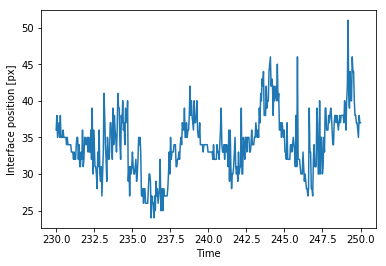

Max Amplitude at 0.2  ampl:  3.8517725065416855


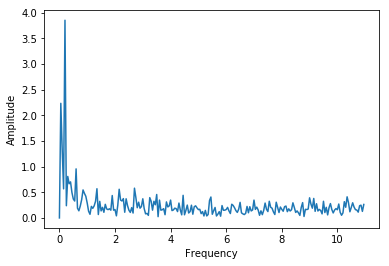

In [29]:
imin = 230*22
imax =240*22
t1 = imax /22
t0 = imin/22
n_samples = imax-imin
ampls = []
for i in range(imin, imax):
    #print(i)
    img = read_file("wave/frame%s.jpg" %i)
    amplsincol = []

    ampls.append(printMaxAmpl(img, refcut,100)[0])
ampls = np.array(ampls)
plt.plot(np.linspace(t0, t1, ampls.shape[0]), ampls)
plt.xlabel('Time')
plt.ylabel('Interface position [px]')
plt.show()
#plt.xlim(90, 150)

np_fft = np.fft.fft(ampls-np.average(ampls))
amplitudes = 2/n_samples * np.abs(np_fft) 
frequencies = np.fft.fftfreq(n_samples) * n_samples * 1/(t1-t0)
print("Max Amplitude at", frequencies[:len(frequencies)//2][np.argmax(amplitudes)], " ampl: ", np.max(amplitudes))

plt.plot(frequencies[:len(frequencies)//2], amplitudes[:len(np_fft)//2])
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

## 11 V


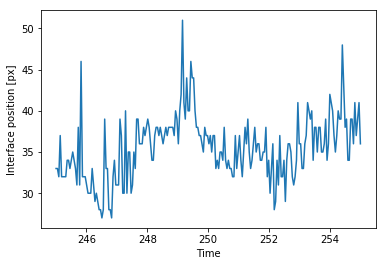

Max Amplitude at 0.2  ampl:  3.3690918217187598


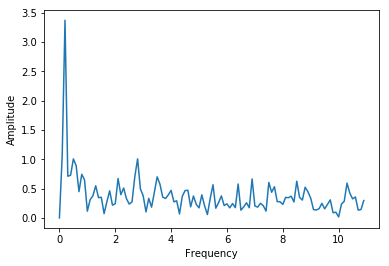

In [30]:
imin = 245*22
imax = 255*22
t1 = imax /22
t0 = imin/22
n_samples = imax-imin
ampls = []
for i in range(imin, imax):
    #print(i)
    img = read_file("wave/frame%s.jpg" %i)
    amplsincol = []

    ampls.append(printMaxAmpl(img, refcut,100)[0])
ampls = np.array(ampls)
plt.plot(np.linspace(t0, t1, ampls.shape[0]), ampls)
plt.xlabel('Time')
plt.ylabel('Interface position [px]')
plt.show()
#plt.xlim(90, 150)

np_fft = np.fft.fft(ampls-np.average(ampls))
amplitudes = 2/n_samples * np.abs(np_fft) 
frequencies = np.fft.fftfreq(n_samples) * n_samples * 1/(t1-t0)
print("Max Amplitude at", frequencies[:len(frequencies)//2][np.argmax(amplitudes)], " ampl: ", np.max(amplitudes))

plt.plot(frequencies[:len(frequencies)//2], amplitudes[:len(np_fft)//2])
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

### Increasing frequency:

Text(0,0.5,'Amplitude')

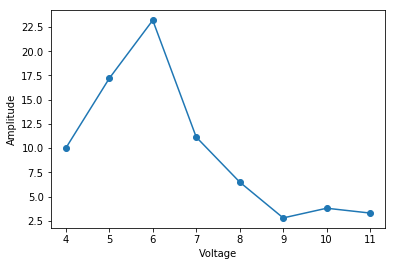

In [31]:
v = [4, 5, 6, 7, 8, 9, 10, 11]
ampl = [10., 17.2, 23.2, 11.14, 6.5, 2.8, 3.8, 3.3]
plt.plot(v, ampl, '-o')
plt.xlabel('Voltage')
plt.ylabel('Amplitude')